# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, precision_recall_curve

# Import Data

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df = df.drop(['Time'], axis=1)

In [5]:
# changing class to category to help with the visualizations
df['Class'] = df['Class'].astype('int64')

In [6]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# Feature Selection

In [8]:
numerical_features = df.select_dtypes(include='number').drop(['Class'], axis=1).columns
target = 'Class'

# Train Test Split

In [9]:
X = df[numerical_features]
y = df[target]

In [10]:
# since I had too much data to train, I decided to use a bigger test set instead of doing undersampling and losing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

# Dataset Balance

In [11]:
# im undersampling because the dataset add too much data. ideally this should be after the scaling takes place

In [12]:
# X_train.shape

In [13]:
# y_train.value_counts()

In [14]:
# undersampler = RandomUnderSampler(sampling_strategy=0.005, random_state=10)

In [15]:
# X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [16]:
# X_train.shape

In [17]:
# y_train.value_counts()

# Outlier Removal

In [18]:
# Does not apply since we have very few data and outliers seem to be the anomalies we want to detect

# Numerical Transformers

In [19]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale with StandardScaler
])

# Categorical Transformers

In [20]:
# Does not apply because there are no categorical variables

# Preprocessing Pipeline

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', numeric_transformer, numerical_features),
    ])

# Modeling Functions

In [22]:
def show_results(y_test, y_pred):    
    # 1. Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # 2. Classification Report (Precision, Recall, F1-Score, Support)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # 3. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualize Confusion Matrix using Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # 4. Precision, Recall, F1-Score (Bar Chart)
    # Extract precision, recall, and F1 scores from classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = report['1']  # Or you can use 'macro avg' or other types
    
    # Plot Precision, Recall, F1-Score
    metrics_data = {
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1-score']
    }
    
    # Create bar chart for the metrics
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(metrics_data.keys()), y=list(metrics_data.values()))
    plt.title("Precision, Recall, F1-Score")
    plt.ylabel("Score")
    plt.ylim(0, 1)  # Limit y-axis to 0-1
    plt.show()

In [23]:
def show_roc_curve(model, X, y):
    y_pred_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (area = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
    print(f"The AUC for the Classifier is: {roc_auc:.4f}")

    # Calculate Youden's J statistic (TPR - FPR)
    j_scores = tpr - fpr
    
    # Find the index of the best threshold (maximum J score)
    best_threshold_index = np.argmax(j_scores)
    
    # The best threshold based on Youden's J
    best_threshold = thresholds[best_threshold_index]
    print(f"Best Threshold based on Youden's J statistic: {best_threshold}")

In [24]:
def show_cross_validation_stats(grid_search):     
    results = pd.DataFrame(grid_search.cv_results_)
    
    # Print out the results of the grid search (train vs validation)
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)
    
    # Display relevant columns for overfitting check
    # We look at mean_train_score and mean_test_score for each parameter combination
    print("Top 10 Hyperparameter Combinations and their Scores:")
    print(results.sort_values(by='rank_test_score')[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score', 'rank_test_score']].head(10))

    # Check the training and validation scores across different hyperparameters
    train_scores = results['mean_train_score']
    valid_scores = results['mean_test_score']
    
    # Plot the training vs validation scores
    plt.figure(figsize=(8, 6))
    plt.plot(train_scores, label='Training Scores', color='blue', marker='o')
    plt.plot(valid_scores, label='Validation Scores', color='red', marker='x')
    plt.xlabel('Grid Search Iteration')
    plt.ylabel('Score (Accuracy)')
    plt.title('Training vs Validation Scores During GridSearchCV')
    plt.legend()
    plt.show()

In [25]:
def show_hyperparameter_training_stats(grid_search, parameter):
    results = pd.DataFrame(grid_search.cv_results_)
    
    if results[f'param_classifier__{parameter}'].dtype in ['float64', 'int64']:
        # If the parameter is numeric, sort by its numerical values
        results = results.sort_values(by=f'param_classifier__{parameter}')
    else:
        # If the parameter is categorical (string), sort alphabetically
        results = results.sort_values(by=f'param_classifier__{parameter}', key=lambda x: x.str.lower())

    # Visualize the performance for specific hyperparameters
    plt.figure(figsize=(12, 6))
    plt.errorbar(results[f'param_classifier__{parameter}'].astype(str), results['mean_train_score'], yerr=results['std_train_score'], label='Mean Train Score', capsize=4, fmt='o')
    plt.errorbar(results[f'param_classifier__{parameter}'].astype(str), results['mean_test_score'], yerr=results['std_test_score'], label='Mean Test Score (Validation)', capsize=4, fmt='o')
    plt.xlabel(parameter)
    plt.ylabel('Score (Accuracy)')
    plt.title(f'Training vs. Validation Score across {parameter}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [26]:
def show_feature_importances(model):
    feature_importances = model.named_steps['classifier'].feature_importances_
    features_names = model.named_steps['preprocessor'].get_feature_names_out()
    
    importance_df = pd.DataFrame({
        'Feature': features_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print(importance_df)
    
    # Plotting the horizontal bar chart
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis()  # To display the most important feature at the top
    plt.tight_layout()

In [27]:
report_ac = {}

# Modeling Parametrizations

In [28]:
# since we are trying to detect as many credit card frauds as possible I will opt for a recall optimization to detect the most positive cases possible
metric_to_optimize = 'recall'

In [29]:
# we need to add the classifier__ to denote the parameter of the classifier in the pipeline
param_grid_nb = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # smoothing values to avoid division by zero
}

param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],            # Inverse of regularization strength
    'classifier__penalty': ['l2'],                       # L2 regularization (common with 'lbfgs')
    'classifier__solver': ['lbfgs'],                     # Solver that supports L2
}

param_grid_dt = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# param_grid_svc = {
#     'classifier__C': [0.01, 0.1, 0.5, 1],
#     'classifier__kernel': ['rbf', 'linear'],
#     'classifier__gamma': ['scale', 'auto', 0.01, 0.1, 1]
# }

# way too heavy on this dataset, passing the default one just to check the results
param_grid_svc = {}

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],           # Number of trees
    'classifier__max_depth': [5, 10, 20],                 # Max depth of the tree
    'classifier__min_samples_split': [2, 5],              # Min samples to split an internal node
    'classifier__min_samples_leaf': [1, 2],               # Min samples at a leaf node
    'classifier__max_features': ['sqrt', 'log2'],         # Number of features to consider at each split
}

param_grid_xgb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 6, 10, 20],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
}

# Naive Bayes

In [30]:
nb_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

In [31]:
grid_search_nb = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid_nb,
    cv=5,
    scoring=metric_to_optimize,
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

In [32]:
grid_search_nb.fit(X_train, y_train)

nb_model = grid_search_nb.best_estimator_

y_pred_nb = nb_model.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [33]:
accuracy = accuracy_score(y_test, y_pred_nb)
report = classification_report(y_test, y_pred_nb, output_dict=True)['1']
report['accuracy'] = accuracy

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_nb)
pr_auc = float(auc(recall, precision))
report['precision-recall auc'] = pr_auc
print(report)

report_ac['Naive Bayes'] = report

{'precision': 0.06154308015610928, 'recall': 0.8333333333333334, 'f1-score': 0.11462119094213027, 'support': 246.0, 'accuracy': 0.9777604561669616, 'precision-recall auc': 0.44758216337515305}


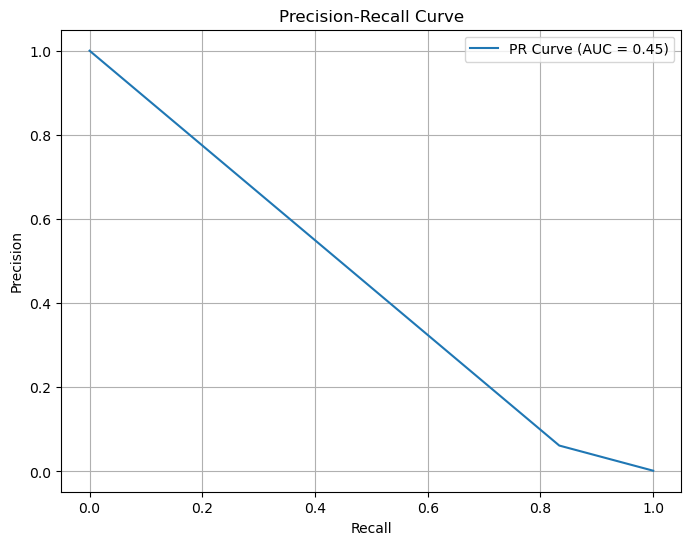

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.9778

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    142158
           1       0.06      0.83      0.11       246

    accuracy                           0.98    142404
   macro avg       0.53      0.91      0.55    142404
weighted avg       1.00      0.98      0.99    142404



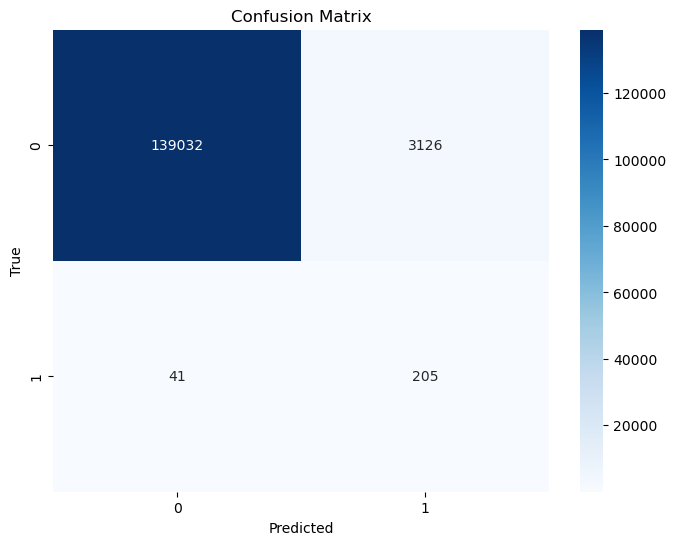

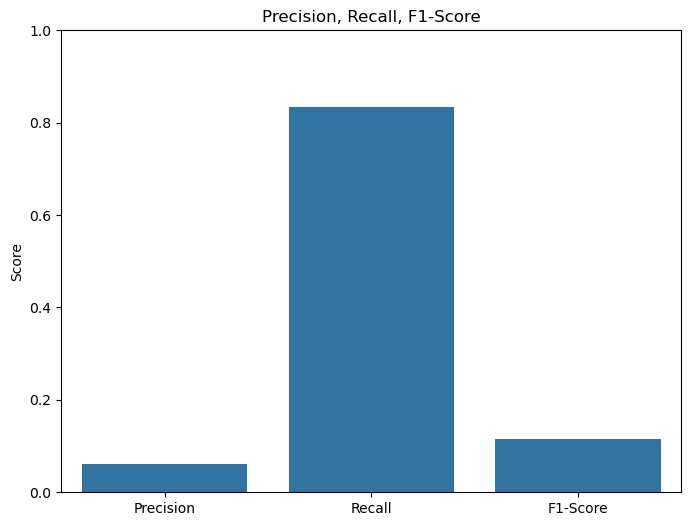

In [35]:
show_results(y_test, y_pred_nb)

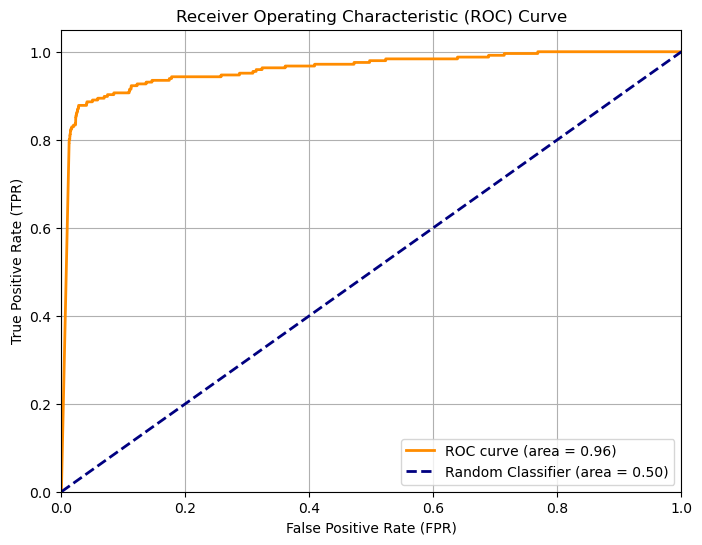

The AUC for the Classifier is: 0.9602
Best Threshold based on Youden's J statistic: 0.00024863831035841207


In [36]:
show_roc_curve(nb_model, X_test, y_test)

Best parameters: {'classifier__var_smoothing': 1e-09}
Best cross-validation score: 0.8251428571428573
Top 10 Hyperparameter Combinations and their Scores:
                                 params  mean_train_score  std_train_score  \
0  {'classifier__var_smoothing': 1e-09}          0.827235         0.008501   
1  {'classifier__var_smoothing': 1e-08}          0.827235         0.008501   
2  {'classifier__var_smoothing': 1e-07}          0.827235         0.008501   
3  {'classifier__var_smoothing': 1e-06}          0.827235         0.008501   
4  {'classifier__var_smoothing': 1e-05}          0.827235         0.008501   

   mean_test_score  std_test_score  rank_test_score  
0         0.825143        0.035831                1  
1         0.825143        0.035831                1  
2         0.825143        0.035831                1  
3         0.825143        0.035831                1  
4         0.825143        0.035831                1  


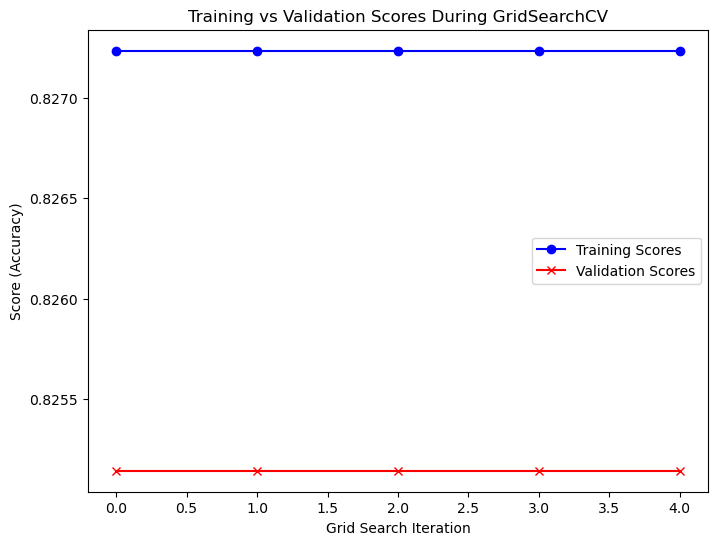

In [37]:
show_cross_validation_stats(grid_search_nb)

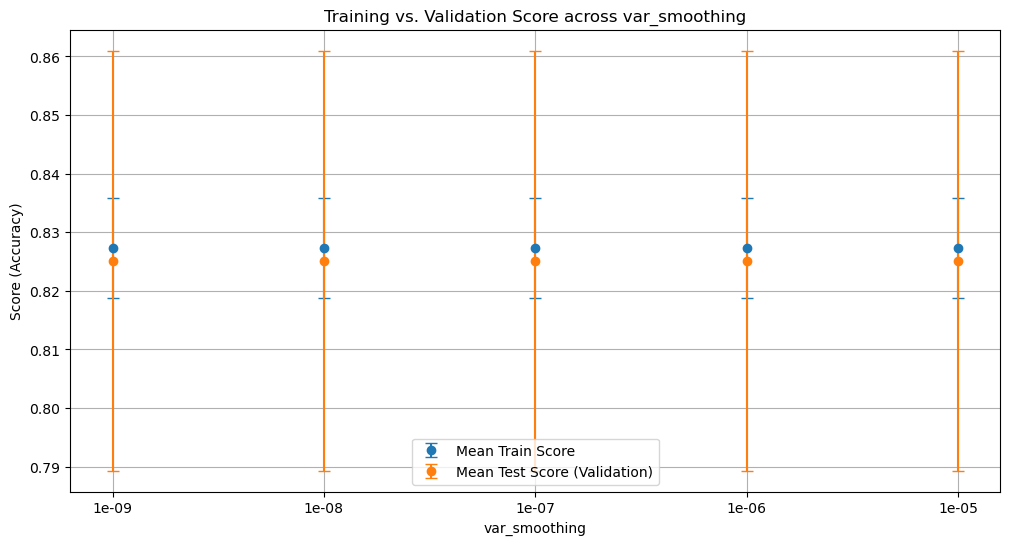

In [38]:
show_hyperparameter_training_stats(grid_search_nb, 'var_smoothing')

# Logistic Regression

In [39]:
lr_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [40]:
grid_search_lr = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid_lr,
    cv=5,
    scoring=metric_to_optimize,
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

In [41]:
grid_search_lr.fit(X_train, y_train)

lr_model = grid_search_lr.best_estimator_

y_pred_lr = lr_model.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [42]:
accuracy = accuracy_score(y_test, y_pred_lr)
report = classification_report(y_test, y_pred_lr, output_dict=True)['1']
report['accuracy'] = accuracy

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lr)
pr_auc = float(auc(recall, precision))
report['precision-recall auc'] = pr_auc
print(report)

report_ac['Logistic Regression'] = report

{'precision': 0.8390804597701149, 'recall': 0.5934959349593496, 'f1-score': 0.6952380952380952, 'support': 246.0, 'accuracy': 0.9991011488441336, 'precision-recall auc': 0.7166393110974926}


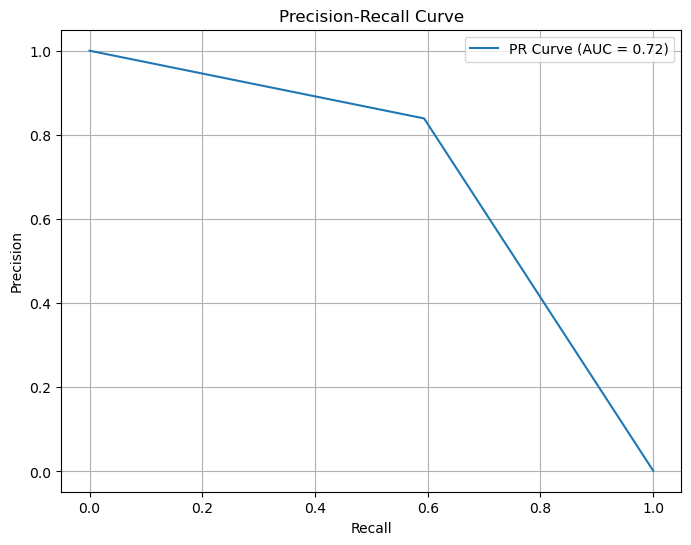

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.9991

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.84      0.59      0.70       246

    accuracy                           1.00    142404
   macro avg       0.92      0.80      0.85    142404
weighted avg       1.00      1.00      1.00    142404



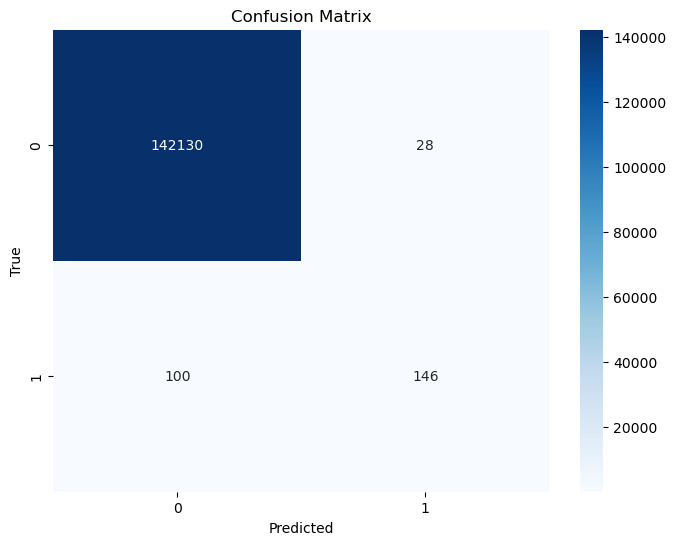

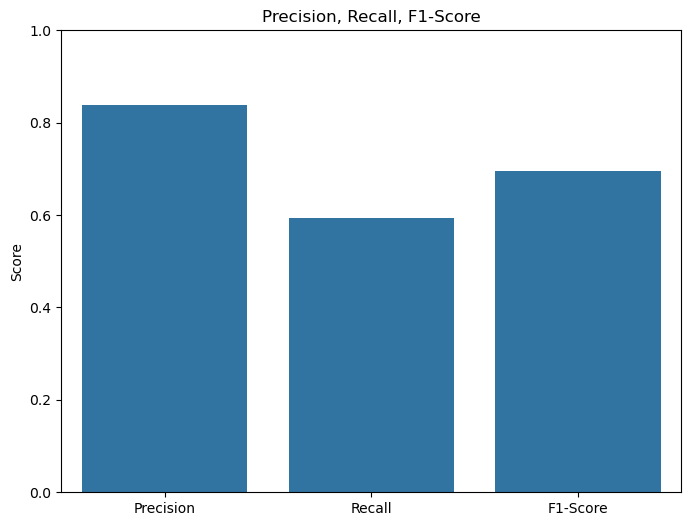

In [44]:
show_results(y_test, y_pred_lr)

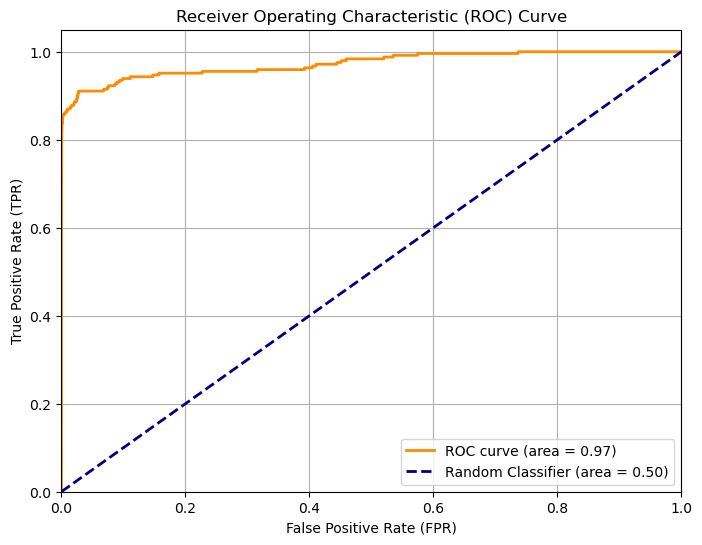

The AUC for the Classifier is: 0.9725
Best Threshold based on Youden's J statistic: 0.002227153482583327


In [45]:
show_roc_curve(lr_model, X_test, y_test)

Best parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best cross-validation score: 0.5731428571428572
Top 10 Hyperparameter Combinations and their Scores:
                                              params  mean_train_score  \
3  {'classifier__C': 10, 'classifier__penalty': '...          0.585347   
2  {'classifier__C': 1, 'classifier__penalty': 'l...          0.584331   
4  {'classifier__C': 100, 'classifier__penalty': ...          0.585347   
1  {'classifier__C': 0.1, 'classifier__penalty': ...          0.577225   
0  {'classifier__C': 0.01, 'classifier__penalty':...          0.540635   

   std_train_score  mean_test_score  std_test_score  rank_test_score  
3         0.022961         0.573143        0.068385                1  
2         0.021019         0.573143        0.068385                1  
4         0.022961         0.573143        0.068385                1  
1         0.022302         0.560898        0.068204                4  
0

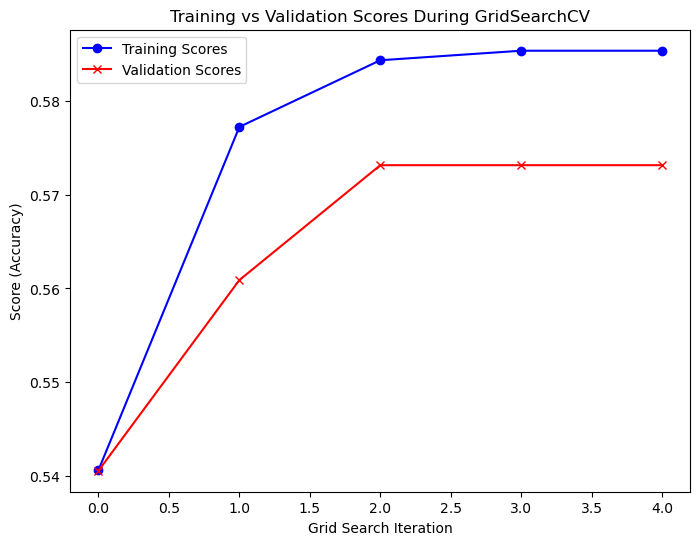

In [46]:
show_cross_validation_stats(grid_search_lr)

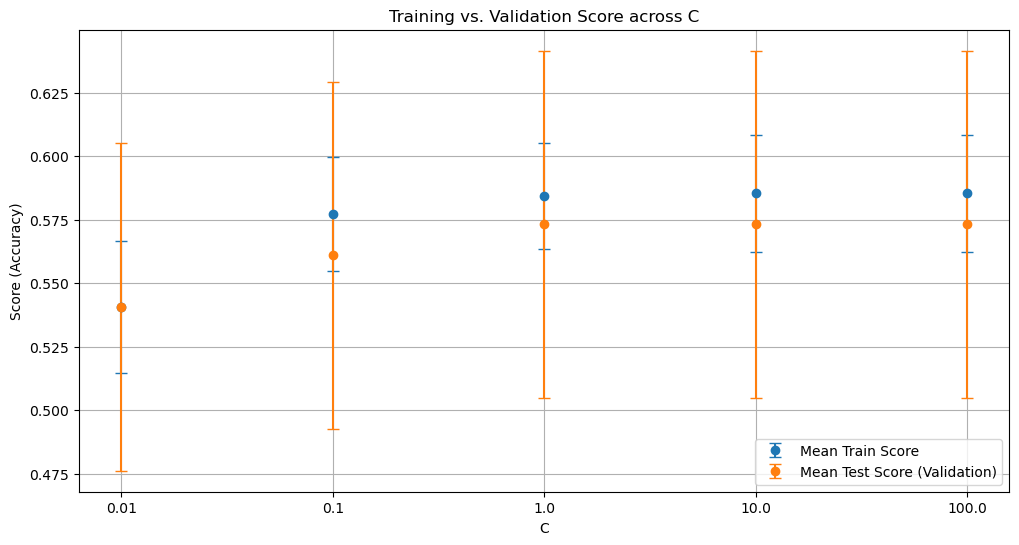

In [47]:
show_hyperparameter_training_stats(grid_search_lr, 'C')

# Decision Tree

In [48]:
dt_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [49]:
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    cv=5,                
    scoring=metric_to_optimize,
    return_train_score=True,
    n_jobs=-1,           
    verbose=1
)

In [50]:
grid_search_dt.fit(X_train, y_train)

dt_model = grid_search_dt.best_estimator_

y_pred_dt = dt_model.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [51]:
accuracy = accuracy_score(y_test, y_pred_dt)
report = classification_report(y_test, y_pred_dt, output_dict=True)['1']
report['accuracy'] = accuracy

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_dt)
pr_auc = float(auc(recall, precision))
report['precision-recall auc'] = pr_auc
print(report)

report_ac['Decision Tree'] = report

{'precision': 0.7509881422924901, 'recall': 0.7723577235772358, 'f1-score': 0.7615230460921844, 'support': 246.0, 'accuracy': 0.9991643493160305, 'precision-recall auc': 0.7618695566252087}


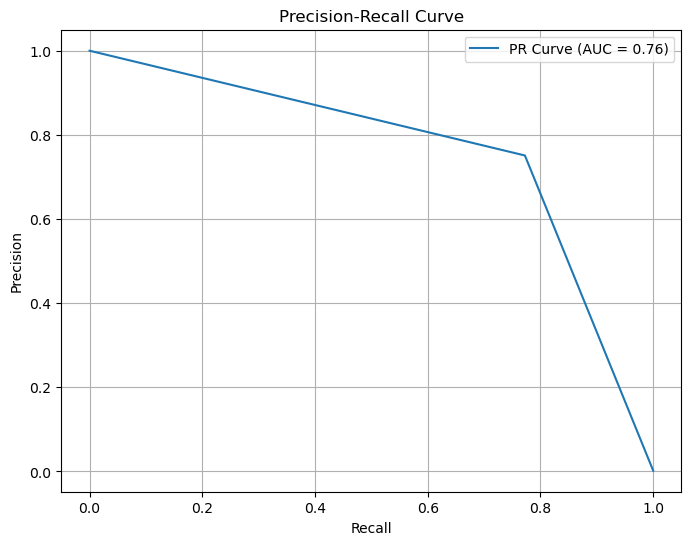

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.9992

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.75      0.77      0.76       246

    accuracy                           1.00    142404
   macro avg       0.88      0.89      0.88    142404
weighted avg       1.00      1.00      1.00    142404



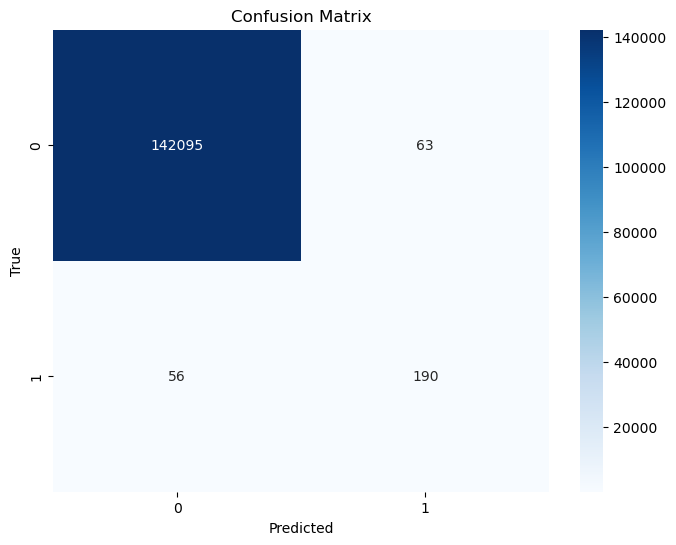

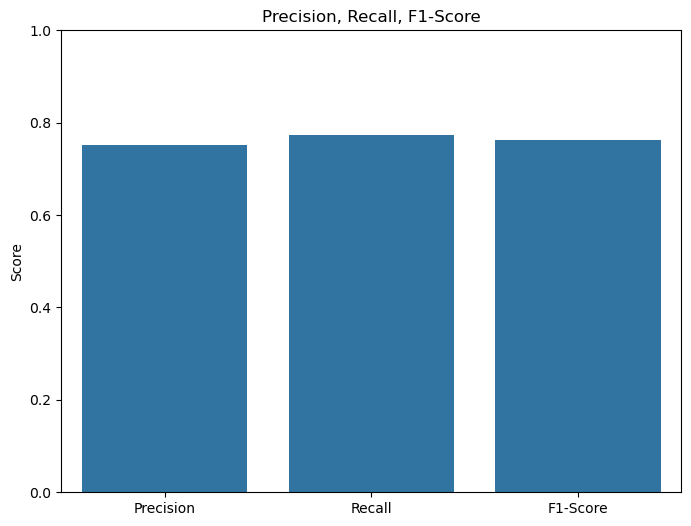

In [53]:
show_results(y_test, y_pred_dt)

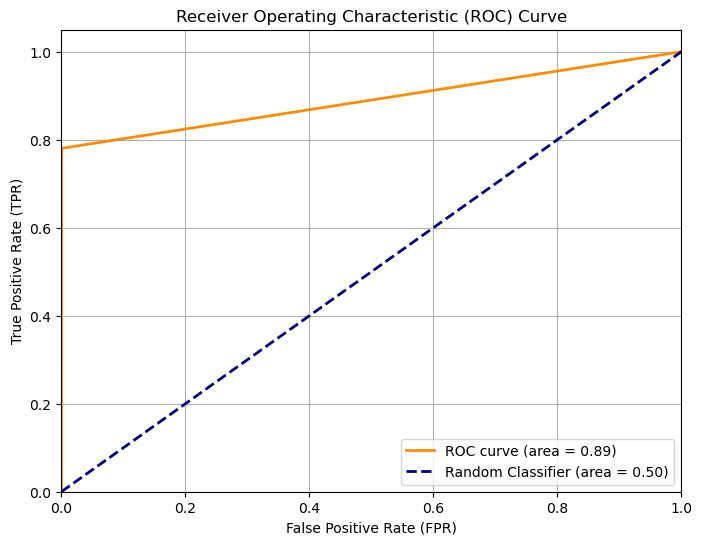

The AUC for the Classifier is: 0.8900
Best Threshold based on Youden's J statistic: 0.25


In [54]:
show_roc_curve(dt_model, X_test, y_test)

Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}
Best cross-validation score: 0.7763265306122449
Top 10 Hyperparameter Combinations and their Scores:
                                               params  mean_train_score  \
46  {'classifier__criterion': 'entropy', 'classifi...          0.976634   
0   {'classifier__criterion': 'gini', 'classifier_...          0.826204   
3   {'classifier__criterion': 'gini', 'classifier_...          0.816047   
1   {'classifier__criterion': 'gini', 'classifier_...          0.826204   
18  {'classifier__criterion': 'gini', 'classifier_...          1.000000   
4   {'classifier__criterion': 'gini', 'classifier_...          0.814016   
2   {'classifier__criterion': 'gini', 'classifier_...          0.817052   
7   {'classifier__criterion': 'gini', 'classifier_...          0.790651   
49  {'classifier__criterion': 'entropy', 'classifi...          0.91462

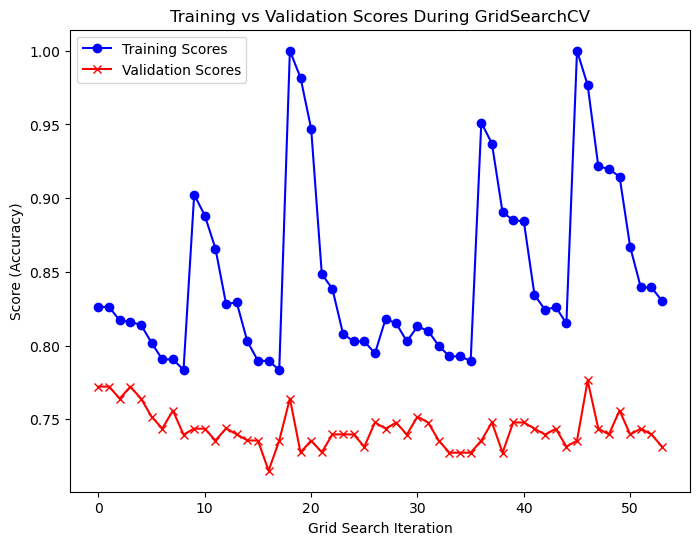

In [55]:
show_cross_validation_stats(grid_search_dt)

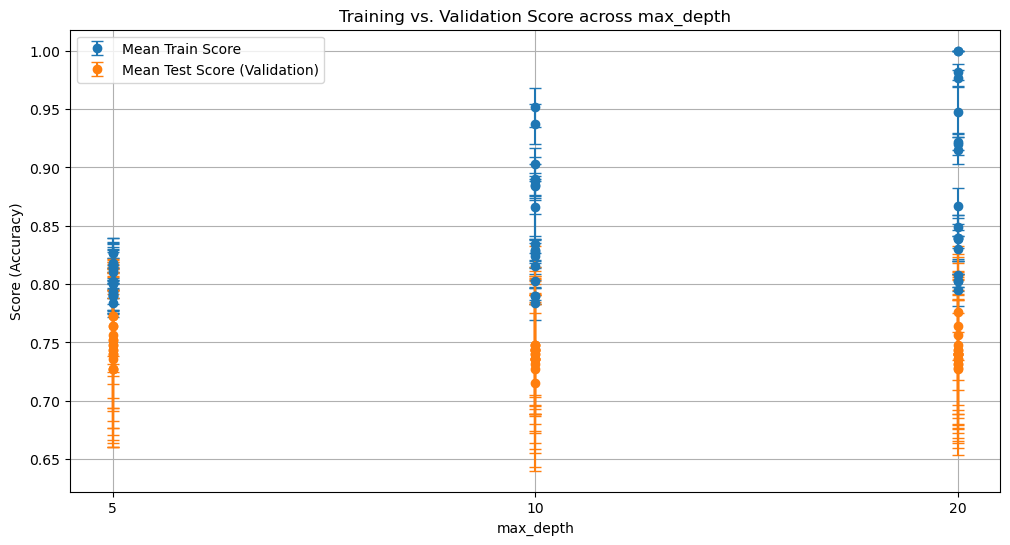

In [56]:
show_hyperparameter_training_stats(grid_search_dt, 'max_depth')

                    Feature  Importance
16     num_transformer__V17    0.561858
13     num_transformer__V14    0.149629
9      num_transformer__V10    0.048236
11     num_transformer__V12    0.034443
3       num_transformer__V4    0.027174
28  num_transformer__Amount    0.021319
5       num_transformer__V6    0.014747
18     num_transformer__V19    0.014046
20     num_transformer__V21    0.014043
25     num_transformer__V26    0.014043
12     num_transformer__V13    0.013368
19     num_transformer__V20    0.012335
26     num_transformer__V27    0.012114
7       num_transformer__V8    0.009625
0       num_transformer__V1    0.009379
2       num_transformer__V3    0.006575
6       num_transformer__V7    0.005826
24     num_transformer__V25    0.005659
17     num_transformer__V18    0.005042
14     num_transformer__V15    0.004616
8       num_transformer__V9    0.004365
15     num_transformer__V16    0.004184
10     num_transformer__V11    0.003118
23     num_transformer__V24    0.002535


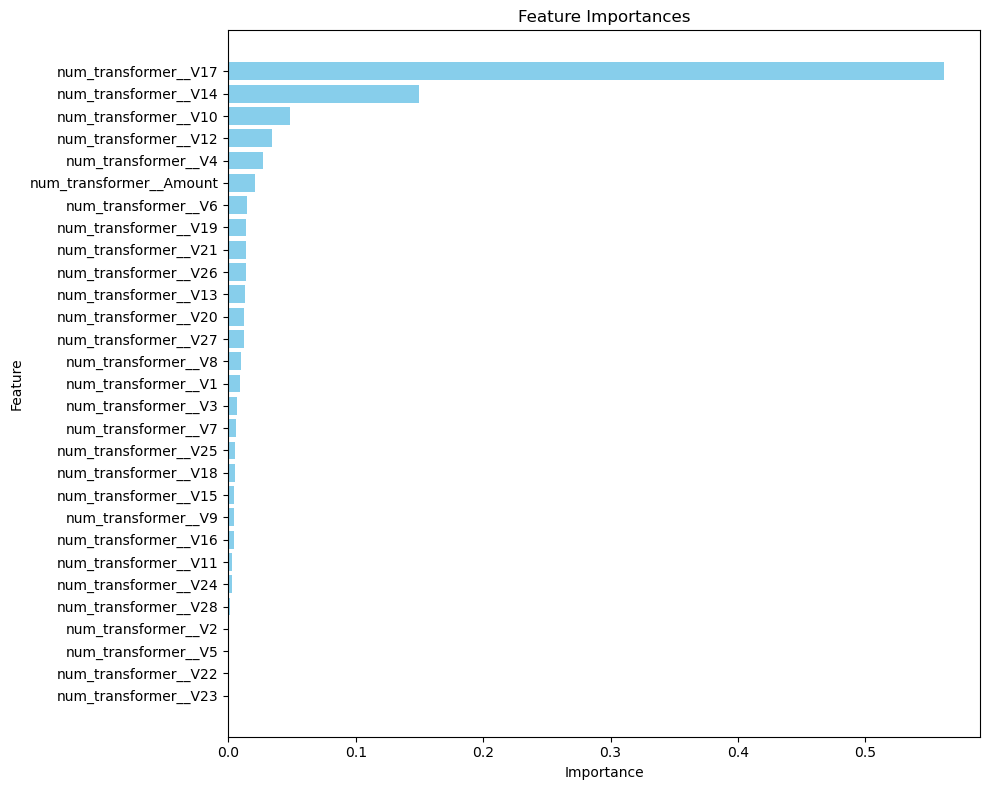

In [57]:
show_feature_importances(dt_model)

# Support Vector Machine

In [58]:
# svc_model = Pipeline(steps = [
#     ('preprocessor', preprocessor),
#     ('classifier', SVC(probability=True))
# ])

In [59]:
# grid_search_svc = GridSearchCV(
#     estimator=svc_model,
#     param_grid=param_grid_svc,
#     cv=5,
#     scoring=metric_to_optimize,
#     return_train_score=True,
#     n_jobs=-1,
#     verbose=1
# )

In [60]:
# grid_search_svc.fit(X_train, y_train)

# svc_model = grid_search_svc.best_estimator_

# y_pred_svc = svc_model.predict(X_test)

In [61]:
# accuracy = accuracy_score(y_test, y_pred_svc)
# report = classification_report(y_test, y_pred_svc, output_dict=True)['1']
# report['accuracy'] = accuracy

# precision, recall, thresholds = precision_recall_curve(y_test, y_pred_svc)
# pr_auc = float(auc(recall, precision))
# report['precision-recall auc'] = pr_auc
# print(report)

# report_ac['Support Vector Machine'] = report

In [62]:
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend()
# plt.grid(True)
# plt.show()

In [63]:
# show_results(y_test, y_pred_svc)

In [64]:
# show_roc_curve(svc_model, X_test, y_test)

In [65]:
# show_cross_validation_stats(grid_search_svc)

In [66]:
# show_hyperparameter_training_stats(grid_search_svc, 'kernel')

# Random Forest

In [67]:
rf_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [68]:
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring=metric_to_optimize,
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

In [69]:
grid_search_rf.fit(X_train, y_train)

rf_model = grid_search_rf.best_estimator_

y_pred_rf = rf_model.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [70]:
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf, output_dict=True)['1']
report['accuracy'] = accuracy

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
pr_auc = float(auc(recall, precision))
report['precision-recall auc'] = pr_auc
print(report)

report_ac['Random Forest'] = report

{'precision': 0.9411764705882353, 'recall': 0.7804878048780488, 'f1-score': 0.8533333333333334, 'support': 246.0, 'accuracy': 0.9995365298727564, 'precision-recall auc': 0.8610217391488326}


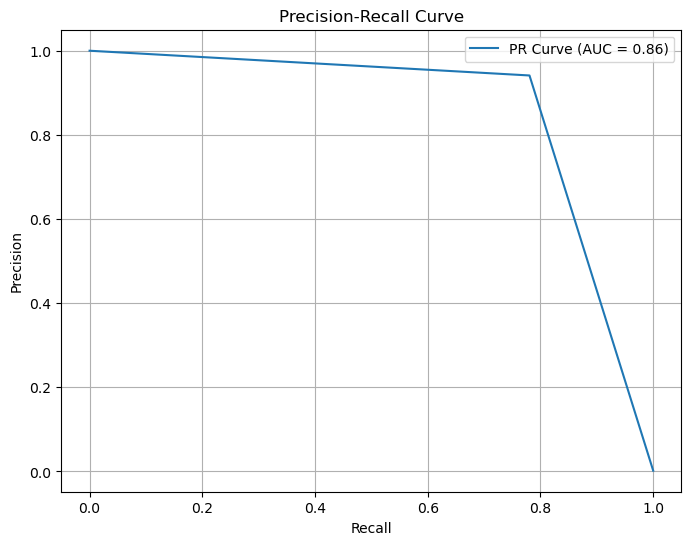

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.94      0.78      0.85       246

    accuracy                           1.00    142404
   macro avg       0.97      0.89      0.93    142404
weighted avg       1.00      1.00      1.00    142404



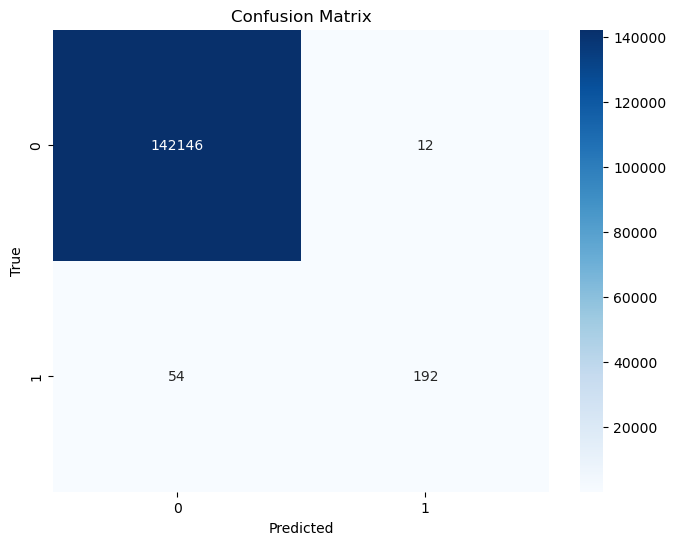

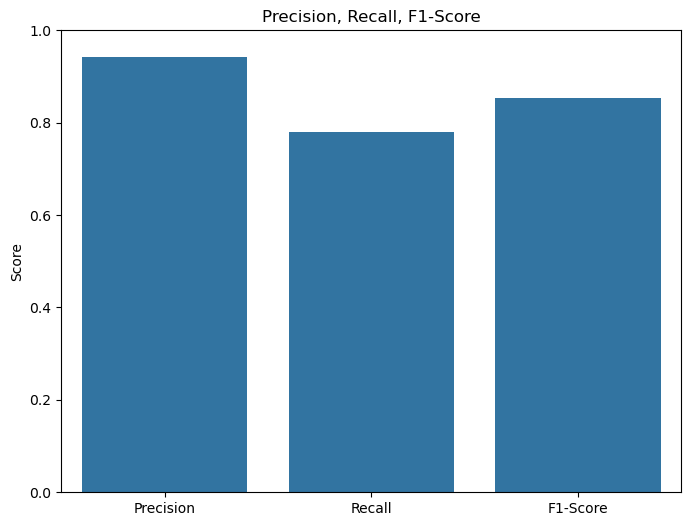

In [72]:
show_results(y_test, y_pred_rf)

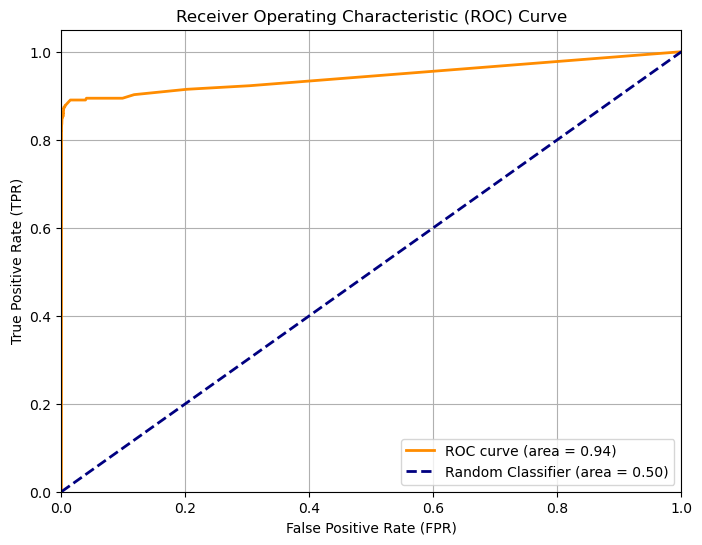

The AUC for the Classifier is: 0.9443
Best Threshold based on Youden's J statistic: 0.02


In [73]:
show_roc_curve(rf_model, X_test, y_test)

Best parameters: {'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best cross-validation score: 0.7642448979591837
Top 10 Hyperparameter Combinations and their Scores:
                                               params  mean_train_score  \
48  {'classifier__max_depth': 20, 'classifier__max...          0.995934   
25  {'classifier__max_depth': 10, 'classifier__max...          0.841464   
49  {'classifier__max_depth': 20, 'classifier__max...          0.998985   
31  {'classifier__max_depth': 10, 'classifier__max...          0.827235   
38  {'classifier__max_depth': 10, 'classifier__max...          0.835362   
33  {'classifier__max_depth': 10, 'classifier__max...          0.828255   
28  {'classifier__max_depth': 10, 'classifier__max...          0.834352   
27  {'classifier__max_depth': 10, 'classifier__max...          0.833326   
60  {'classifier__max_depth': 20, 'cla

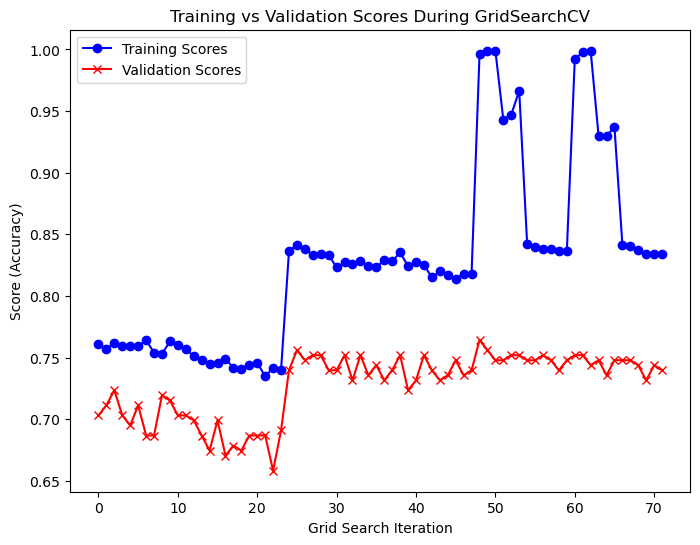

In [74]:
show_cross_validation_stats(grid_search_rf)

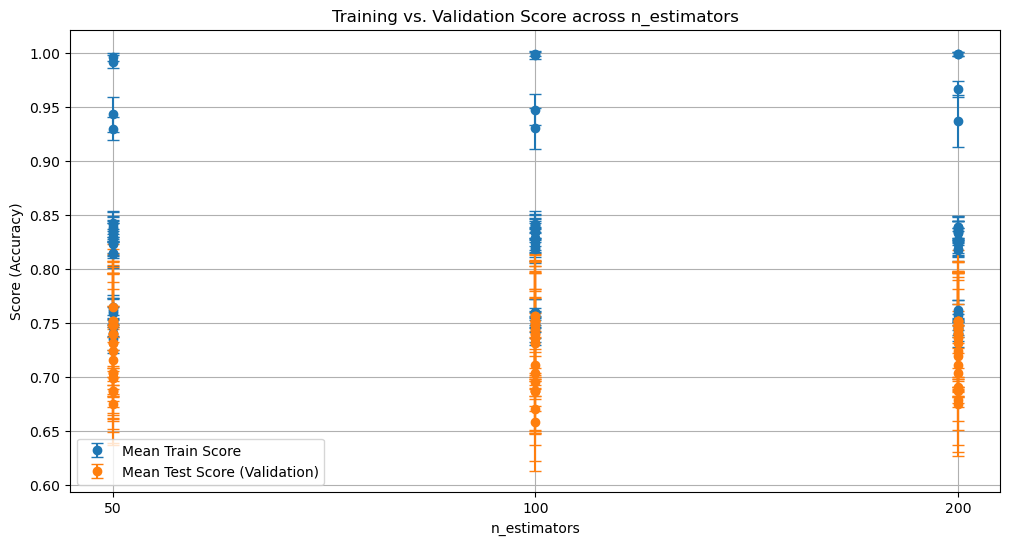

In [75]:
show_hyperparameter_training_stats(grid_search_rf, 'n_estimators')

                    Feature  Importance
16     num_transformer__V17    0.181566
13     num_transformer__V14    0.150523
11     num_transformer__V12    0.100443
9      num_transformer__V10    0.069377
10     num_transformer__V11    0.062908
8       num_transformer__V9    0.050925
15     num_transformer__V16    0.044078
17     num_transformer__V18    0.036289
6       num_transformer__V7    0.028110
3       num_transformer__V4    0.025723
20     num_transformer__V21    0.020482
25     num_transformer__V26    0.019834
19     num_transformer__V20    0.019275
2       num_transformer__V3    0.016539
18     num_transformer__V19    0.015712
0       num_transformer__V1    0.015287
27     num_transformer__V28    0.015151
1       num_transformer__V2    0.014570
5       num_transformer__V6    0.013411
4       num_transformer__V5    0.011704
23     num_transformer__V24    0.011469
7       num_transformer__V8    0.010144
24     num_transformer__V25    0.010116
26     num_transformer__V27    0.010043


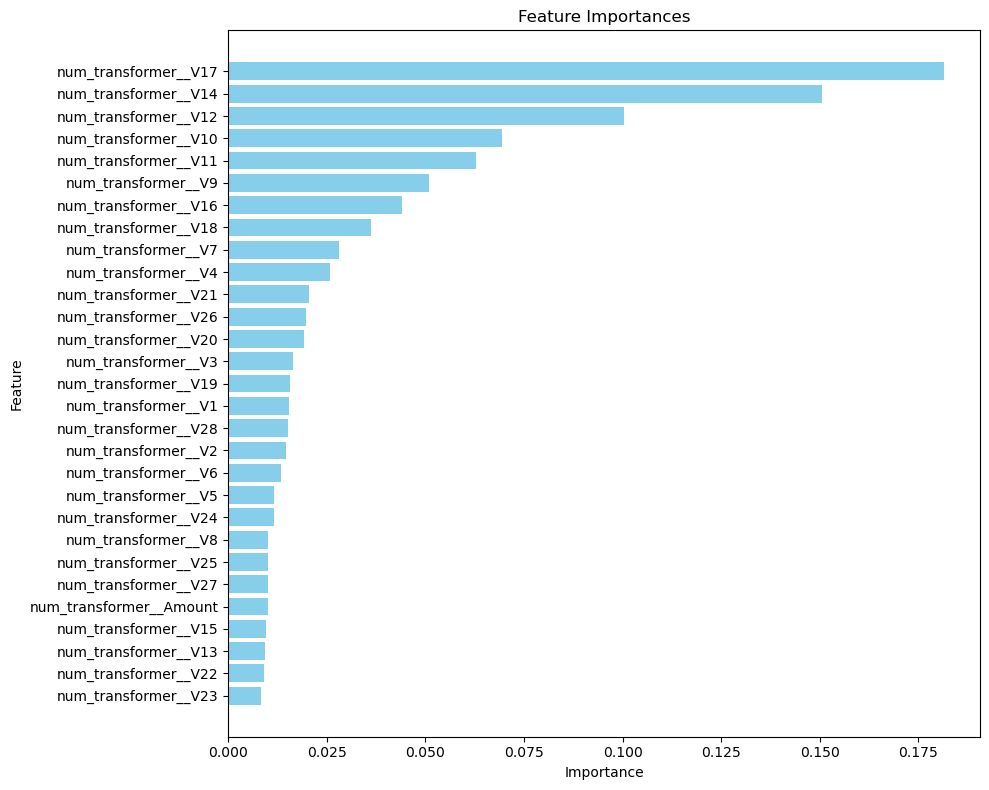

In [76]:
show_feature_importances(rf_model)

# XGBoost

In [80]:
xgb_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(objective='binary:logistic',eval_metric='mlogloss'))
])

In [81]:
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring=metric_to_optimize,
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

In [82]:
grid_search_xgb.fit(X_train, y_train)

xgb_model = grid_search_xgb.best_estimator_

y_pred_xgb = xgb_model.predict(X_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [83]:
accuracy = accuracy_score(y_test, y_pred_xgb)
report = classification_report(y_test, y_pred_xgb, output_dict=True)['1']
report['accuracy'] = accuracy

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb)
pr_auc = float(auc(recall, precision))
report['precision-recall auc'] = pr_auc
print(report)

report_ac['XGBoost'] = report

{'precision': 0.9289099526066351, 'recall': 0.7967479674796748, 'f1-score': 0.8577680525164114, 'support': 246.0, 'accuracy': 0.9995435521474116, 'precision-recall auc': 0.8630045169095351}


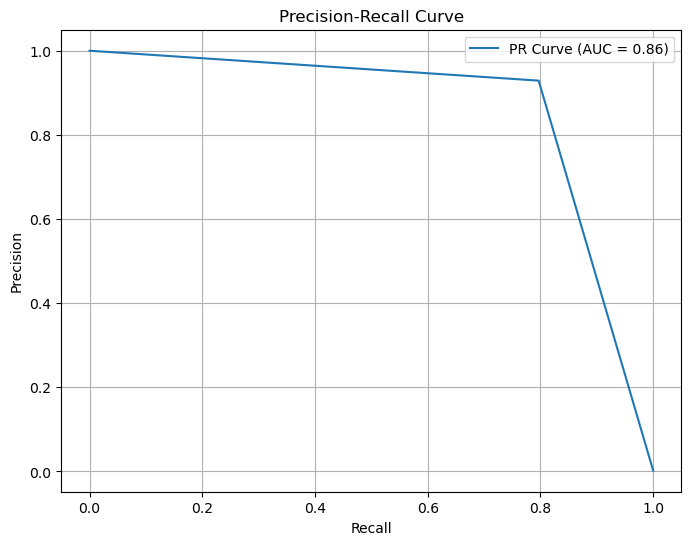

In [84]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.93      0.80      0.86       246

    accuracy                           1.00    142404
   macro avg       0.96      0.90      0.93    142404
weighted avg       1.00      1.00      1.00    142404



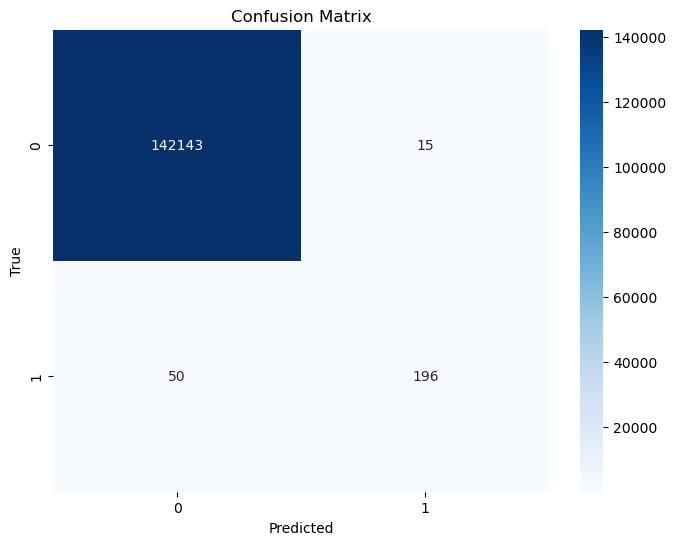

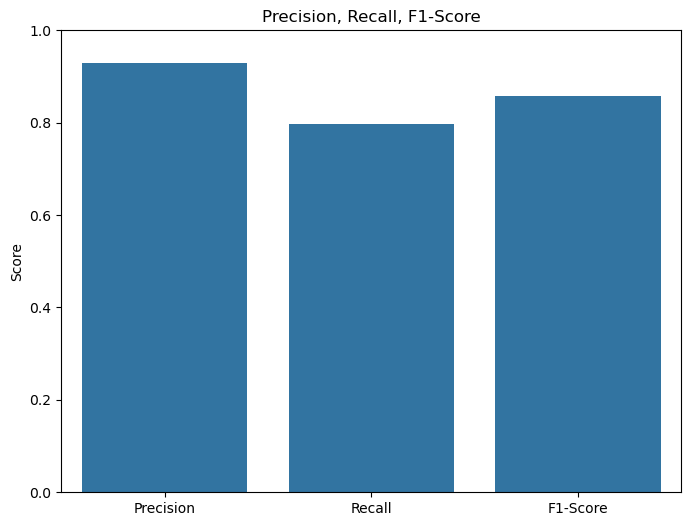

In [85]:
show_results(y_test, y_pred_xgb)

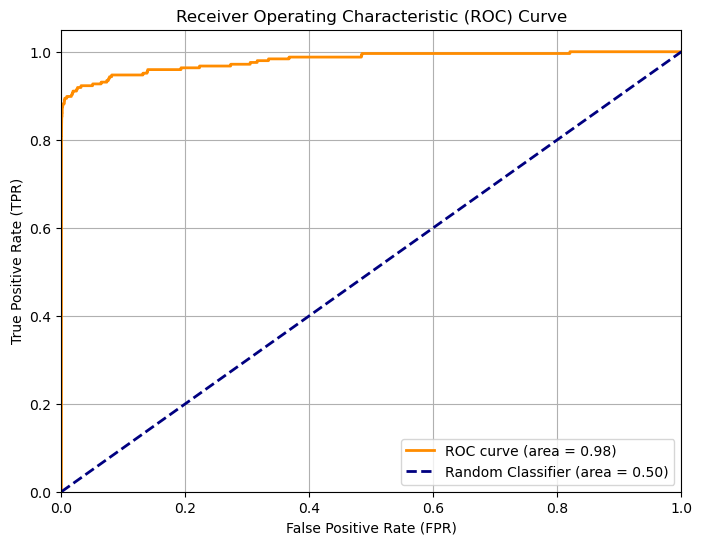

The AUC for the Classifier is: 0.9805
Best Threshold based on Youden's J statistic: 0.0009445538162253797


In [86]:
show_roc_curve(xgb_model, X_test, y_test)

Best parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best cross-validation score: 0.7804081632653062
Top 10 Hyperparameter Combinations and their Scores:
                                                params  mean_train_score  \
28   {'classifier__colsample_bytree': 0.8, 'classif...          0.940024   
99   {'classifier__colsample_bytree': 1.0, 'classif...          0.839433   
97   {'classifier__colsample_bytree': 1.0, 'classif...          0.799782   
37   {'classifier__colsample_bytree': 0.8, 'classif...          0.926815   
106  {'classifier__colsample_bytree': 1.0, 'classif...          1.000000   
113  {'classifier__colsample_bytree': 1.0, 'classif...          1.000000   
41   {'classifier__colsample_bytree': 0.8, 'classif...          1.000000   
119  {'classifier__colsample_bytree': 1.0, 'classif...          1.000000   
38   {'classifier__colsample_bytree

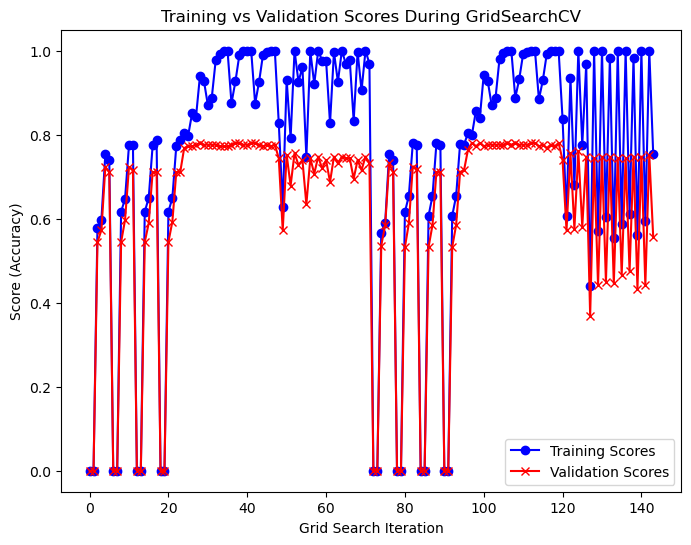

In [87]:
show_cross_validation_stats(grid_search_xgb)

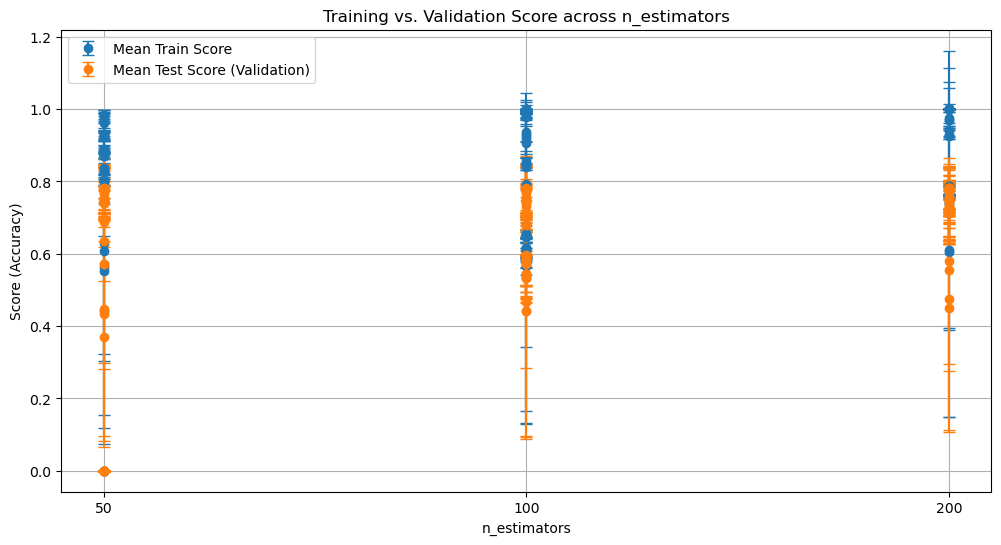

In [88]:
show_hyperparameter_training_stats(grid_search_xgb, 'n_estimators')

                    Feature  Importance
13     num_transformer__V14    0.429919
11     num_transformer__V12    0.094896
9      num_transformer__V10    0.085039
3       num_transformer__V4    0.033255
25     num_transformer__V26    0.022066
26     num_transformer__V27    0.020720
19     num_transformer__V20    0.018871
28  num_transformer__Amount    0.017786
6       num_transformer__V7    0.017556
27     num_transformer__V28    0.016859
1       num_transformer__V2    0.016100
7       num_transformer__V8    0.015787
15     num_transformer__V16    0.015263
0       num_transformer__V1    0.015069
18     num_transformer__V19    0.014171
8       num_transformer__V9    0.014092
4       num_transformer__V5    0.013993
2       num_transformer__V3    0.013954
5       num_transformer__V6    0.013293
14     num_transformer__V15    0.011969
21     num_transformer__V22    0.011745
24     num_transformer__V25    0.011502
17     num_transformer__V18    0.011337
22     num_transformer__V23    0.011336


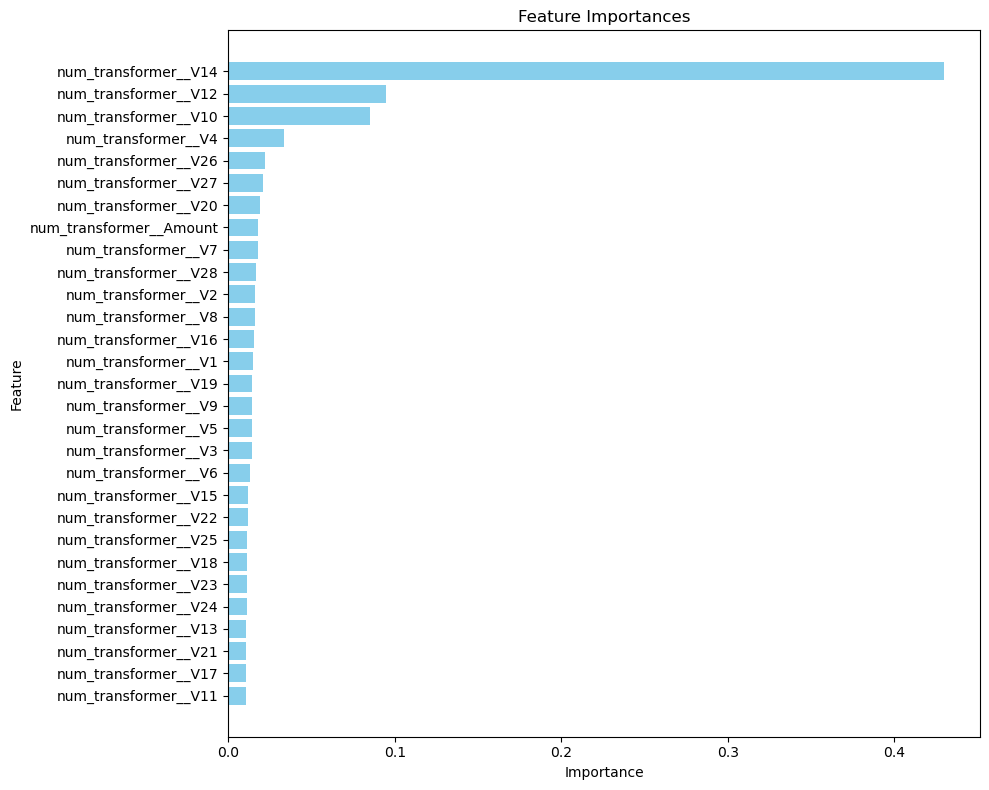

In [89]:
show_feature_importances(xgb_model)

# Model Evaluation

In [90]:
report_ac

{'Naive Bayes': {'precision': 0.06154308015610928,
  'recall': 0.8333333333333334,
  'f1-score': 0.11462119094213027,
  'support': 246.0,
  'accuracy': 0.9777604561669616,
  'precision-recall auc': 0.44758216337515305},
 'Logistic Regression': {'precision': 0.8390804597701149,
  'recall': 0.5934959349593496,
  'f1-score': 0.6952380952380952,
  'support': 246.0,
  'accuracy': 0.9991011488441336,
  'precision-recall auc': 0.7166393110974926},
 'Decision Tree': {'precision': 0.7509881422924901,
  'recall': 0.7723577235772358,
  'f1-score': 0.7615230460921844,
  'support': 246.0,
  'accuracy': 0.9991643493160305,
  'precision-recall auc': 0.7618695566252087},
 'Random Forest': {'precision': 0.9411764705882353,
  'recall': 0.7804878048780488,
  'f1-score': 0.8533333333333334,
  'support': 246.0,
  'accuracy': 0.9995365298727564,
  'precision-recall auc': 0.8610217391488326},
 'XGBoost': {'precision': 0.9289099526066351,
  'recall': 0.7967479674796748,
  'f1-score': 0.8577680525164114,
  'su

# Notes

I decided not to try the sampling strategies because the results were already very good. Both in precision and mainly in recall since we wanted to detect the majority of the TP to detect the frauds

This happens because we had features that offer great separation between the classes, and the models were capable of detecting the frauds very easily

I had to remove rows from the training set because there was too many data to train the most complex models and they wouldn't finish the training. And instead of applying undersampling, I passed more data to the test set through the split function

As future work, I could create a bigger training set and smaller test set and train the best model using more training data to see if the results improve. Additionaly, through the feature importances I could remove some features to also speed up the training